We use past data to create a simulation.

Current_revenue = Previous_revenue * (1 + growth_rate)

Cogs (cost of goods sold) - modeled as a percentage of revenues
Opex (operating expenses) - modeled as a percentage of revenues

Revenues – Cost of goods sold = Gross profit

Revenues – Opex = Operating profit


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# revenue mean
rev_m = 170
# revenue std. deviation
rev_stdev = 20
iterations = 1000

In [3]:
# produce the simulation of future revenues with random normal distribution generator
rev = np.random.normal(rev_m, rev_stdev, iterations)
# rev

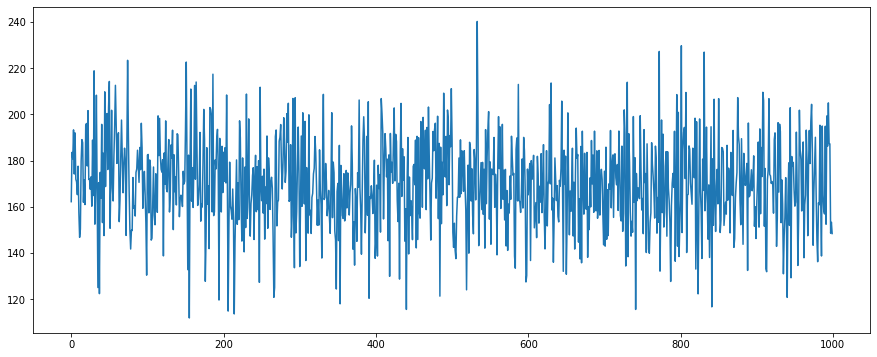

In [4]:
plt.figure(figsize=(15,6))
plt.plot(rev)
plt.show()

COGS ~ 60% of the revenues

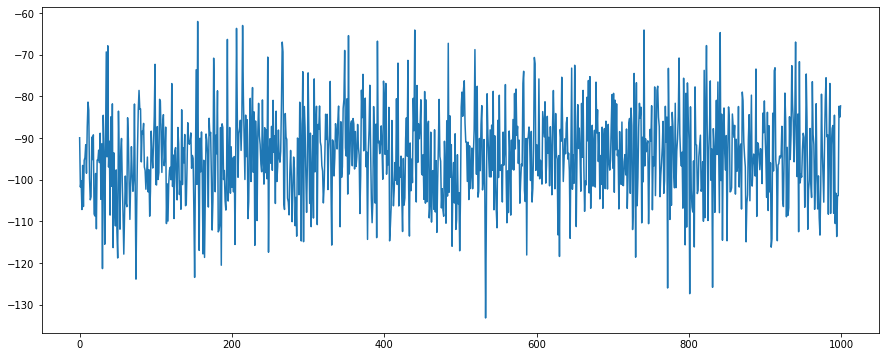

In [5]:
COGS = -(rev * np.random.normal(0.6, 0.1))
plt.figure(figsize=(15,6))
plt.plot(COGS)
plt.show()

In [6]:
COGS.mean()

-94.31316413829936

In [7]:
COGS.std()

10.971947554726873

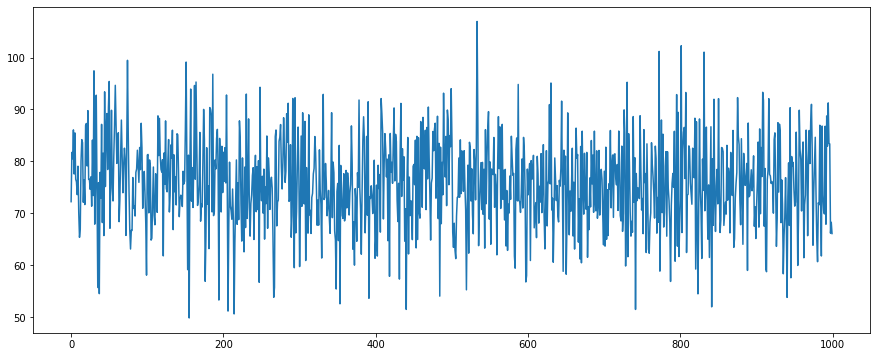

In [8]:
Gross_Profit = rev + COGS
Gross_Profit

plt.figure(figsize=(15,6))
plt.plot(Gross_Profit)
plt.show()

In [9]:
print("Max gross profit: {}\nMin gross profit: {}" \
      .format(max(Gross_Profit), min(Gross_Profit)))
print("Gross profit mean: {}\nGross profit std.dev.: {}" \
      .format(Gross_Profit.mean(), Gross_Profit.std()))

Max gross profit: 106.96673617910142
Min gross profit: 49.814901412022856
Gross profit mean: 75.73514806990114
Gross profit std.dev.: 8.810669011739654


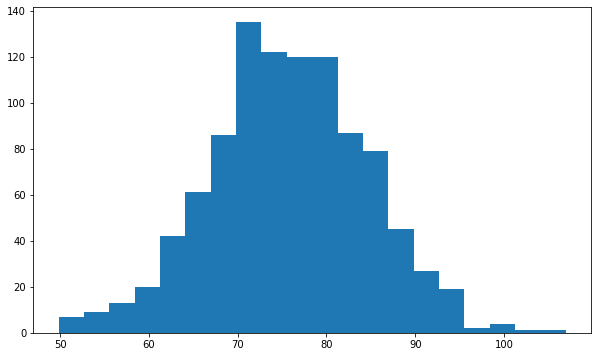

In [10]:
plt.figure(figsize=(10,6))
plt.hist(Gross_Profit, bins=20)
plt.show()

$Price\ Today = Price\ Yesterday * e^r$ , where r - log return of share price between yesterday and today, $e^r= e^{ln(\frac{price\ today}{price\ yesterday})} = \frac{price\ today}{price\ yesterday}$

We know yesterdays stock price, we don't know $r$ as it's a random variable.

Brownian motion is used to model $r$:

1. Drift - the direction rates of return have been headed in the past.

Calculate stocks periodic daily return over the historical period: $\ln(\frac{Current\ Price}{Previous\ Price})$. Then, calculate daily returns avarage, std. diviatiion and variance.

${Drift}=(u - \frac{1}{2}\sigma^2)$, where $u$ - average daily return. Drift is an expected daily return of the stock.


2. Valotility (random variable)

$Random\ variable = \sigma * Z(Rand(0,1))$, where $Rand(0,1)$ - is a random number between 0 and 1, it is a percentage. If we assume expected future returns are distributed normaly, $Z(Rand(0,1))$ corresponds to the distance between the mean and the events, expressed as the number of standard deviations (e.g. 2 standart deviations).

The equation of the stocks price today becomes:
$$Price\ Today = Price\ Yesterday * e^{(u -  \frac{1}{2}\sigma^2)+ \sigma Z[Rand(0,1)]}$$

It's a good way to asses the upside and downside of the investment. Repeat the calculation 1000 times.


In [11]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
# import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2011-1-1')['Adj Close']

In [13]:
# data.pct_change() - percentage change between the current and prior element
log_returns = np.log(1 + data.pct_change())

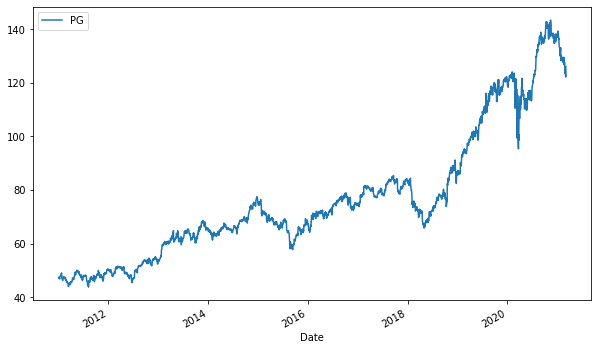

In [14]:
# plot historical prices
data.plot(figsize=(10,6))

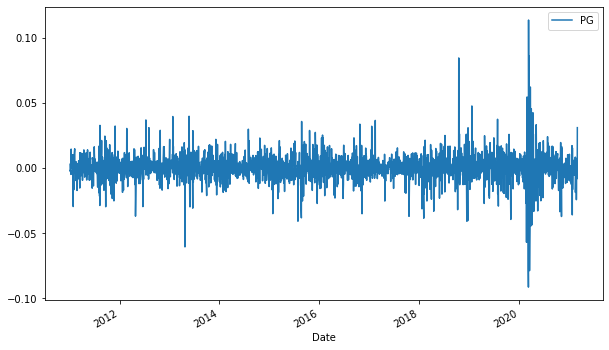

In [15]:
# plot log returns
log_returns.plot(figsize=(10,6))
# returns are normally distributed and have a stable mean

In [16]:
u = log_returns.mean()
var = log_returns.var()

# we are predicting DAILY stock price so there is no annualization (* 250)
drift = u - 0.5 * var
drift

PG    0.000322
dtype: float64

In [17]:
stdev = log_returns.std()
stdev

PG    0.011024
dtype: float64

In [18]:
# drift.values - returns np.array
np.array(drift)

array([0.0003223])

If an event has 95% chance of occuring and distribution is normal, then the distance between this observation and the mean would be approximately $1.65*\sigma$

In [19]:
stats.norm.ppf(0.95) 

1.6448536269514722

Generate random multidimensional array

In [20]:
Z = stats.norm.ppf(np.random.rand(10,2))

$Daily\ Returns = e^r$ , $r= {drift} + stdev * Z$

In [21]:
t_intervals = 1000
itterations = 10

In [22]:
daily_returns = np.exp(drift.values + stdev.values * stats.norm.ppf(np.random.rand(t_intervals, itterations)))
daily_returns

array([[1.00195027, 1.01213262, 0.98697604, ..., 1.00496132, 0.99235328,
        1.00592493],
       [0.99837434, 0.99738102, 1.002081  , ..., 1.02043422, 1.00503704,
        1.00112557],
       [1.00257637, 0.99805323, 1.0009558 , ..., 1.00172245, 1.03614863,
        0.9896761 ],
       ...,
       [1.00856031, 0.98225854, 0.99492425, ..., 0.98706958, 0.98731713,
        0.99866973],
       [1.00774726, 0.99953042, 1.00080796, ..., 0.99301042, 1.00165637,
        0.99726877],
       [0.98601023, 1.00431146, 0.97837511, ..., 0.99607177, 0.99424184,
        1.00909567]])

$S_t= S_0*{daily\_return}_t$

$S_{t+1}= S_t*{daily\_return}_{t+1}$

...

$S_{t+999}= S_{t+998}*{daily\_return}_{t+999}$

In [23]:
S0 = data.iloc[-1]
S0

PG    125.980003
Name: 2021-03-05 00:00:00, dtype: float64

In [24]:
# generate 1000x10 array filled with 0s
price_list= np.zeros_like(daily_returns)
price_list[0] = S0
# price_list

In [25]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1] * daily_returns[t]

# price_list

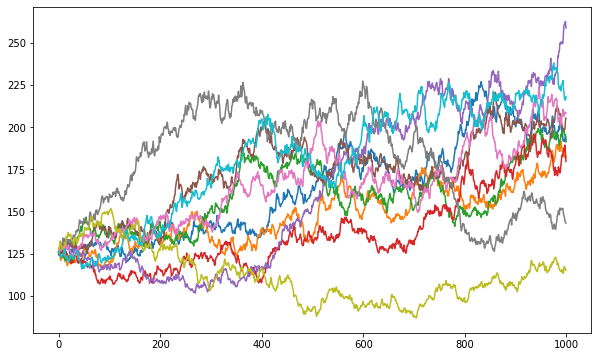

In [29]:
plt.figure(figsize=(10,6))
plt.plot(price_list)